In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/cars_clus.csv")

In [3]:
df

,manufact,sales,resale,type,price,engine_s
0,Acura,16.919,16.360,0,21.50,1.8
1,Acura,39.384,19.875,0,28.40,3.2
2,Acura,8.588,29.725,0,42.00,3.5
3,Audi,20.397,22.255,0,23.99,1.8
4,Audi,18.780,23.555,0,33.95,2.8
...,...,...,...,...,...,...
112,Volkswagen,9.761,11.425,0,14.90,2.0
113,Volkswagen,83.721,13.240,0,16.70,2.0
114,Volkswagen,51.102,16.725,0,21.20,1.8
115,Volkswagen,9.569,16.575,0,19.99,2.0


In [4]:
df.describe()

,sales,resale,type,price,engine_s
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,0.247863,25.969487,3.048718
std,75.058933,11.605632,0.433629,14.149699,1.055169
min,0.110000,5.160000,0.000000,9.235000,1.000000
25%,16.767000,11.240000,0.000000,16.980000,2.200000
50%,32.299000,14.010000,0.000000,21.665000,3.000000
75%,76.029000,19.875000,0.000000,29.465000,3.800000
max,540.561000,67.550000,1.000000,82.600000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   manufact  117 non-null    object 
 1   sales     117 non-null    float64
 2   resale    117 non-null    float64
 3   type      117 non-null    int64  
 4   price     117 non-null    float64
 5   engine_s  117 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.6+ KB


In [6]:
df.isnull().sum()

manufact    0
sales       0
resale      0
type        0
price       0
engine_s    0
dtype: int64

In [7]:
print("unique number of values in dataset species:",df["manufact"].nunique())
print("unique species in carclus dataset:",df["manufact"].unique())

unique number of values in dataset species: 26
unique species in carclus dataset: ['Acura' 'Audi' 'BMW' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Honda' 'Hyundai' 'Infiniti' 'Jeep' 'Lexus' 'Lincoln' 'Mitsubishi'
 'Mercury' 'Mercedes-Benz' 'Nissan' 'Oldsmobile' 'Plymouth' 'Pontiac'
 'Porsche' 'Saturn' 'Toyota' 'Volkswagen']


In [8]:
df.manufact[df.manufact=='Acura']=0
df.manufact[df.manufact=='Audi']=1
df.manufact[df.manufact=='BMW']=2
df.manufact[df.manufact=='Buick']=3
df.manufact[df.manufact=='Cadillac']=4
df.manufact[df.manufact=='Chevrolet']=5
df.manufact[df.manufact=='Chrysler']=6
df.manufact[df.manufact=='Dodge']=7
df.manufact[df.manufact=='Ford']=8
df.manufact[df.manufact=='Honda']=9
df.manufact[df.manufact=='Hyundai']=10
df.manufact[df.manufact=='Infiniti']=11
df.manufact[df.manufact=='Jeep']=12
df.manufact[df.manufact=='Lincoln' ]=13
df.manufact[df.manufact=='Mitsubishi']=14
df.manufact[df.manufact=='Mercury']=15
df.manufact[df.manufact=='Mercedes-Benz']=16
df.manufact[df.manufact=='Nissan']=17
df.manufact[df.manufact=='Oldsmobile']=18
df.manufact[df.manufact=='Plymouth']=19
df.manufact[df.manufact=='Pontiac']=20
df.manufact[df.manufact=='Porsche']=21
df.manufact[df.manufact=='Saturn']=22

df.manufact[df.manufact=='Toyota']=23
df.manufact[df.manufact=='Volkswagen']=24
df.manufact[df.manufact=='Lexus']=25

C:\Users\tusha\AppData\Local\Temp\ipykernel_14256\1007377325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.manufact[df.manufact=='Acura']=0
C:\Users\tusha\AppData\Local\Temp\ipykernel_14256\1007377325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.manufact[df.manufact=='Audi']=1
C:\Users\tusha\AppData\Local\Temp\ipykernel_14256\1007377325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.manufact[df.manufact=='BMW

In [9]:
df.corr()# check correlations in data

,manufact,sales,resale,type,price,engine_s
manufact,1.000000,-0.118947,0.084596,0.037327,0.007102,-0.173423
sales,-0.118947,1.000000,-0.275426,0.278774,-0.251705,0.038111
resale,0.084596,-0.275426,1.000000,-0.091679,0.954757,0.527187
type,0.037327,0.278774,-0.091679,1.000000,-0.076303,0.182515
price,0.007102,-0.251705,0.954757,-0.076303,1.000000,0.649170
engine_s,-0.173423,0.038111,0.527187,0.182515,0.649170,1.000000


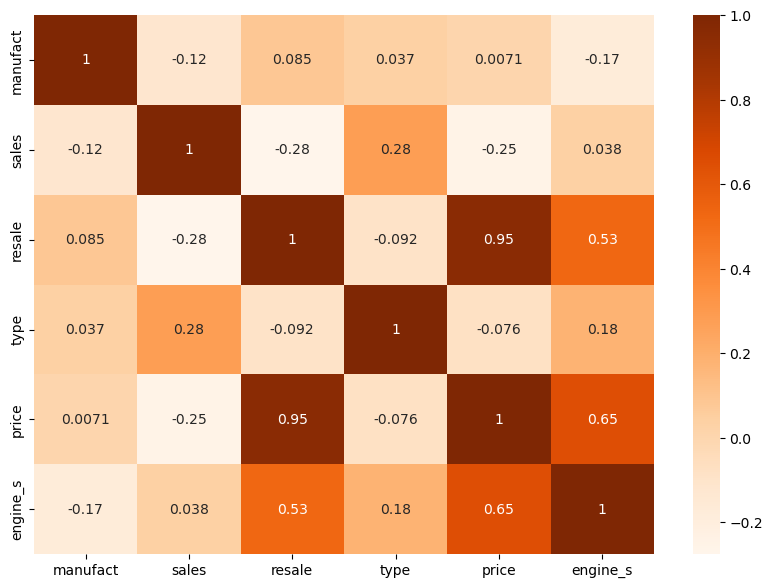

In [10]:
# Use heatmap to see correlations in data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot= True,cmap="Oranges")
plt.show()

In [11]:
df['manufact'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 25, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=object)

In [12]:
x=df.iloc[:,[0,1,2,4,5]]
x.head()

,manufact,sales,resale,price,engine_s
0,0,16.919,16.360,21.50,1.8
1,0,39.384,19.875,28.40,3.2
2,0,8.588,29.725,42.00,3.5
3,1,20.397,22.255,23.99,1.8
4,1,18.780,23.555,33.95,2.8


In [13]:
y=df.iloc[:,3]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(93, 5)
(24, 5)
(93,)
(24,)


Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression applied successfully implemented")
y_pred = lr.predict(x_test)

Logistic Regression applied successfully implemented


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[18,  3],
       [ 2,  1]], dtype=int64)

In [18]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:",accuracy*100)

accuracy is: 79.16666666666666


In [19]:
print("classification Report")
print(classification_report(y_test,y_pred))

classification Report
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.25      0.33      0.29         3

    accuracy                           0.79        24
   macro avg       0.57      0.60      0.58        24
weighted avg       0.82      0.79      0.80        24



Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
print("Random Forest Classifier is successfully implemented")
y_pred = rfc.predict(x_test)

Random Forest Classifier is successfully implemented


In [21]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[19,  2],
       [ 3,  0]], dtype=int64)

In [22]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy*100)

accuracy 79.16666666666666


In [23]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.00      0.00      0.00         3

    accuracy                           0.79        24
   macro avg       0.43      0.45      0.44        24
weighted avg       0.76      0.79      0.77        24



Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(x_train,y_train)
print("Decision Tree Classifier is successfully implemented")
y_pred=dtree.predict(x_test)

Decision Tree Classifier is successfully implemented


In [25]:
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
cm

Confusion Matrix


array([[15,  6],
       [ 2,  1]], dtype=int64)

In [26]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 66.66666666666666


In [27]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.14      0.33      0.20         3

    accuracy                           0.67        24
   macro avg       0.51      0.52      0.49        24
weighted avg       0.79      0.67      0.72        24



Support Vector Machine

In [28]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
print("SVC is implemented successfully")
y_pred=svc.predict(x_test)

SVC is implemented successfully


In [29]:
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
cm

Confusion Matrix


array([[21,  0],
       [ 3,  0]], dtype=int64)

In [30]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy*100)

Accuracy 87.5


In [31]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24



c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K nearest neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
print("The KNeighborsClassifier is successfully implemented")

The KNeighborsClassifier is successfully implemented


In [33]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[21  0]
 [ 3  0]]


In [34]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 87.5


In [35]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       0.00      0.00      0.00         3

    accuracy                           0.88        24
   macro avg       0.44      0.50      0.47        24
weighted avg       0.77      0.88      0.82        24



c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train,y_train)
print("Naive Bayes is successfully implemented")
y_pred = gnb.predict(x_test)

Naive Bayes is successfully implemented


In [37]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[16  5]
 [ 1  2]]


In [38]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 75.0


In [39]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.29      0.67      0.40         3

    accuracy                           0.75        24
   macro avg       0.61      0.71      0.62        24
weighted avg       0.86      0.75      0.79        24



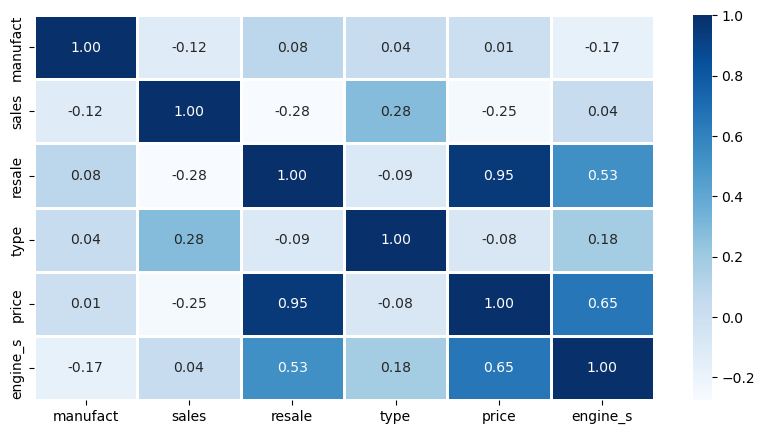

In [40]:
plt.figure(figsize=(10,5))
corr_target= df.drop("type", axis=1)
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)
plt.show()

In [41]:
X=df.drop(['sales','resale','price'],axis=1)
X

,manufact,type,engine_s
0,0,0,1.8
1,0,0,3.2
2,0,0,3.5
3,1,0,1.8
4,1,0,2.8
...,...,...,...
112,24,0,2.0
113,24,0,2.0
114,24,0,1.8
115,24,0,2.0


K Means Algorithm  

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

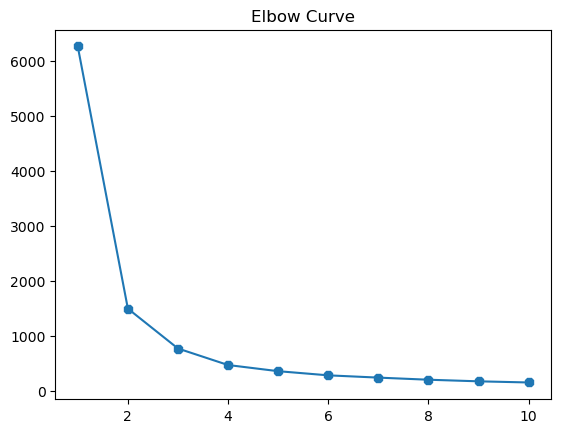

In [42]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker="8")
plt.title('Elbow Curve')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3,n_init=10)
label=kmeans.fit_predict(X)
print(label)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


In [44]:
print(kmeans.cluster_centers_)


[[ 5.8         0.23636364  3.14363636]
 [15.0625      0.34375     3.26875   ]
 [22.16666667  0.16666667  2.64      ]]


In [45]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 75.0


In [46]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.29      0.67      0.40         3

    accuracy                           0.75        24
   macro avg       0.61      0.71      0.62        24
weighted avg       0.86      0.75      0.79        24

